In [9]:
# Dependencies
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Information about the data can be fount here: https://www.nomisweb.co.uk/sources/census_2021_mig

In [2]:
# Create df for migration into the England and Wales
mig_ctry_in_df = pd.read_csv("./Resources/MIG004EW_CTRY_IN.csv")
mig_ctry_in_df.head()

# Remove does not apply rows
mig_ctry_in_df = mig_ctry_in_df[(mig_ctry_in_df['Ethnic group (6 categories) code'] != -8) & 
                        (mig_ctry_in_df['Migration Country (inflow) (5 categories) code'] != -8)]

mig_ctry_in_df

,Countries code,Countries label,Migration Country (inflow) (5 categories) code,Migration Country (inflow) (5 categories) label,Ethnic group (6 categories) code,Ethnic group (6 categories) label,National Statistics Socio-economic Classification (NS-SeC) (10 categories) code,National Statistics Socio-economic Classification (NS-SeC) (10 categories) label,Count
70,E92000001,England,1,Lived at the same address one year ago,1,"Asian, Asian British or Asian Welsh",-8,Does not apply,1098510
71,E92000001,England,1,Lived at the same address one year ago,1,"Asian, Asian British or Asian Welsh",1,"L1, L2 and L3: Higher managerial, administrati...",479171
72,E92000001,England,1,Lived at the same address one year ago,1,"Asian, Asian British or Asian Welsh",2,"L4, L5 and L6: Lower managerial, administrativ...",544692
73,E92000001,England,1,Lived at the same address one year ago,1,"Asian, Asian British or Asian Welsh",3,L7: Intermediate occupations,326621
74,E92000001,England,1,Lived at the same address one year ago,1,"Asian, Asian British or Asian Welsh",4,L8 and L9: Small employers and own account wor...,365784
...,...,...,...,...,...,...,...,...,...
595,W92000004,Wales,4,Inflow: lived elsewhere one year ago outside t...,5,Other ethnic group,5,L10 and L11: Lower supervisory and technical o...,11
596,W92000004,Wales,4,Inflow: lived elsewhere one year ago outside t...,5,Other ethnic group,6,L12: Semi-routine occupations,29
597,W92000004,Wales,4,Inflow: lived elsewhere one year ago outside t...,5,Other ethnic group,7,L13: Routine occupations,67
598,W92000004,Wales,4,Inflow: lived elsewhere one year ago outside t...,5,Other ethnic group,8,L14.1 and L14.2: Never worked and long-term un...,174


In [8]:
# Find the number of migrations in by country and ethnic group
grouped_df = mig_ctry_in_df[['Countries label','Migration Country (inflow) (5 categories) code','Migration Country (inflow) (5 categories) label','Ethnic group (6 categories) label','Count']]
group_df = grouped_df.groupby(['Countries label','Migration Country (inflow) (5 categories) code', 'Ethnic group (6 categories) label']).sum()
group_df.head()

Migration Country (inflow) (5 categories) label  \
Countries label Migration Country (inflow) (5 categories) code Ethnic group (6 categories) label                                                                       
England         1                                              Asian, Asian British or Asian Welsh                 Lived at the same address one year agoLived at...   
                                                               Black, Black British, Black Welsh, Caribbean or...  Lived at the same address one year agoLived at...   
                                                               Mixed or Multiple ethnic groups                     Lived at the same address one year agoLived at...   
                                                               Other ethnic group                                  Lived at the same address one year agoLived at...   
                                                               White                                               Lived at the same address one year agoLived at...   

                                                                                                                      Count  
Countries label Migration Country (inflow) (5 categories) code Ethnic group (6 categories) label                             
England         1                                              Asian, Asian British or Asian Welsh                  4649298  
                                                               Black, Black British, Black Welsh, Caribbean or...   2044014  
                                                               Mixed or Multiple ethnic groups                      1369199  
                                                               Other ethnic group                                   1022901  
                                                               White                                               40624393

In [4]:
# group by migration inflow catergory
catergory_df = grouped_df[['Countries label','Migration Country (inflow) (5 categories) label','Count']]
catergory_df.groupby(['Countries label','Migration Country (inflow) (5 categories) label']).sum()

Count
Countries label Migration Country (inflow) (5 categories) label             
England         Inflow: lived elsewhere one year ago outside th...    528756
                Inflow: lived elsewhere one year ago outside th...     75984
                Inflow: lived elsewhere one year ago, but withi...   5596512
                Lived at the same address one year ago              49709805
Wales           Inflow: lived elsewhere one year ago outside th...     16333
                Inflow: lived elsewhere one year ago outside th...     57235
                Inflow: lived elsewhere one year ago, but withi...    218859
                Lived at the same address one year ago               2786736

C:\Users\Kevin\AppData\Local\Temp\ipykernel_23708\548365187.py:26: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



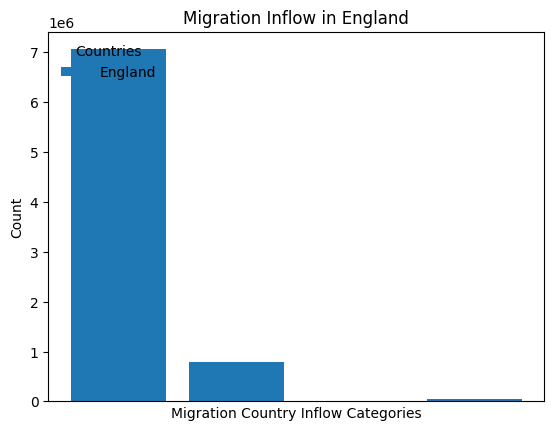

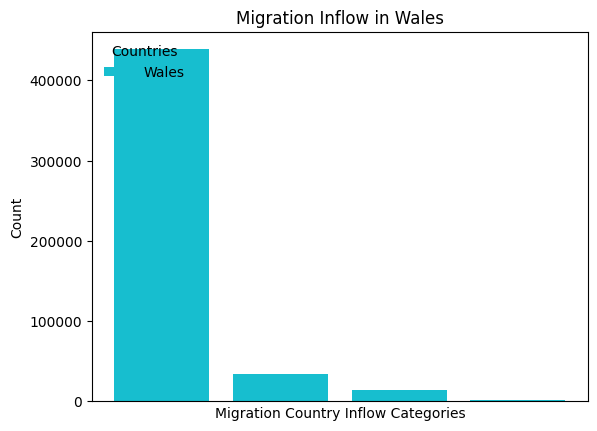

In [10]:
# # Create a bar chart for each country
# for country in catergory_df['Countries label'].unique():
#     country_data = catergory_df[catergory_df['Countries label'] == country]
    
#     fig = px.bar(country_data, x='Migration Country (inflow) (5 categories) label', y='Count',
#                  title=f'Migration Inflow in {country}',
#                  labels={'Count': 'Migration Count'})
    
#     # Customize the layout of the individual plots
#     fig.update_layout(xaxis_title='Migration Country Inflow Categories', yaxis_title='Count')
    
#     # Customize colors for each bar
#     colors = px.colors.qualitative.Set1  # You can choose a different color palette
#     fig.update_traces(marker_color=colors)
    
#     # Remove legend labels under the x-axis
#     # fig.update_layout(showlegend=True, legend_title_text=None)
    
#     # Show the plot for each country
#     fig.show()

# Create a bar chart for each country
countries = catergory_df['Countries label'].unique()

# Choose a color palette for the bars
colors = plt.cm.get_cmap('tab10', len(countries))

for i, country in enumerate(countries):
    country_data = catergory_df[catergory_df['Countries label'] == country]
    
    categories = country_data['Migration Country (inflow) (5 categories) label']
    counts = country_data['Count']
    
    # Create the bar chart
    plt.bar(categories, counts, color=colors(i))
    plt.title(f'Migration Inflow in {country}')
    plt.xlabel('Migration Country Inflow Categories')
    plt.ylabel('Count')
    
    # Customize the legend
    plt.legend([country], loc='upper left', title='Countries', frameon=False)
    
    # Remove x-axis labels
    plt.xticks([])

    # Show the plot for each country
    plt.show()






In [6]:
# group by migration inflow catergory
migration_df = mig_ctry_in_df[['Migration Country (inflow) (5 categories) code','Migration Country (inflow) (5 categories) label','Count']]
migration_df.groupby(['Migration Country (inflow) (5 categories) code']).sum()


,Migration Country (inflow) (5 categories) label,Count
Migration Country (inflow) (5 categories) code,,
1,Lived at the same address one year agoLived at...,52496541
2,"Inflow: lived elsewhere one year ago, but with...",5815371
3,Inflow: lived elsewhere one year ago outside t...,133219
4,Inflow: lived elsewhere one year ago outside t...,545089
